The G1 Climax is an annual Japanase wrestling tournament that's held every summer over 20 days. Rather than a simple knockout tournament it's a league made up two blocks each consisting of 20 wrestlers. The winner of each block then face off and the winner goes to headline wrestle kingdom in January

Let's start off with importing all the relevant libraries which will be updated as we go

Add times to matches, to see who on average has the longest time. Wrestler style, weight, momemntum?
If they won the last match are they going to win the next one


In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
sns.set_style('white')

Read the csv file with the block names

In [2]:
df = pd.read_csv("G1 Competitors.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
A Block    10 non-null object
B Block    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


Only 10 entries with No null objects which is good to see, we can see what the whole dataframe looks like. Of course if we had more rows we wouldn't be able to do this.

In [4]:
df

,A Block,B Block
0,Hiroshi Tanahashi,Kazuchika Okada
1,Togi Makabe,Toru Yano
2,Tomohiro Ishii,Satoshi Kojima
3,Hirooki Goto,Michael Elgin
4,YOSHI-HASHI,Juice Robinson
5,Bad Luck Fale,Tama Tonga
6,Yuji Nagata,SANADA
7,Zack Sabre Jr.,EVIL
8,Kota Ibushi,Minoru Suzuki
9,Tetsuya Naito,Kenny Omega


Some of the wrestler's name have capitals while others don't, let's seperate these into two blocks and make sure we convert all strings to uppercase

In [5]:
A_Block = pd.DataFrame(df['A Block'].str.upper())
A_Block.columns = ['Wrestler']
B_Block = pd.DataFrame(df['B Block'].str.upper())
B_Block.columns = ['Wrestler']

In [6]:
A_Block['Matches'] = np.NAN
A_Block['Wins'] = np.NAN
A_Block['Losses'] = np.NAN
A_Block['Points'] = np.NAN
A_Block['Match_Time'] = np.NAN
B_Block['Matches'] = np.NAN
B_Block['Wins'] = np.NAN
B_Block['Losses'] = np.NAN
B_Block['Points'] = np.NAN


How many potential matches per block?
Using the old perpmuations formula

In [7]:
math.factorial(10)/(math.factorial(2)*math.factorial(10-2))

45.0

Ok there are 45 possible matches, I was going to write a custom function to list all these out but the python community is so large someone has already done what you need. Luckily they have and it comes from the library itertools. We use the function combinations as we're looking for all unique combinations and not permutations. The combination takes a list so we can't simply pass in the data frame and need to select the Wrestler column as a series. W

In [30]:
A_matches = pd.DataFrame.from_records(list(itertools.combinations(A_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
B_matches = pd.DataFrame.from_records(list(itertools.combinations(B_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
A_matches['Winner'] = np.NAN
B_matches['Winner'] = np.NAN
A_matches['Loser'] = np.NAN
B_matches['Loser'] = np.NAN
A_matches['Match'] = 1
B_matches['Match'] = 1
B_matches['Match_Time'] = np.NAN
A_matches['Match_Time'] = np.NAN

In [38]:
A_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time
0,HIROSHI TANAHASHI,ZACK SABRE JR.,ZACK SABRE JR.,HIROSHI TANAHASHI,1,17:18
1,HIROSHI TANAHASHI,TETSUYA NAITO,NaN,NaN,1,NaN
2,HIROSHI TANAHASHI,HIROOKI GOTO,NaN,NaN,1,NaN
3,HIROSHI TANAHASHI,BAD LUCK FALE,HIROSHI TANAHASHI,BAD LUCK FALE,1,11:05
4,HIROSHI TANAHASHI,TOGI MAKABE,NaN,NaN,1,NaN
5,HIROSHI TANAHASHI,TOMOHIRO ISHII,NaN,NaN,1,NaN
6,HIROSHI TANAHASHI,KOTA IBUSHI,NaN,NaN,1,NaN
7,HIROSHI TANAHASHI,YOSHI-HASHI,NaN,NaN,1,NaN
8,HIROSHI TANAHASHI,YUJI NAGATA,NaN,NaN,1,NaN
9,ZACK SABRE JR.,TETSUYA NAITO,NaN,NaN,1,NaN


Ok we now have a table of the potential matches, I decided to write a quick function to update the dataframe with the results rather than updating each row manually. I didn't want to type out the full names either as the spellings of Japanese names can be quite hard. So the function does a partial match and prints out the names it's matched as a check

In [31]:
def updateresults(df,winner,loser, time):#We want to find the index for the match for these two wrestlers
    winner = winner.upper()
    loser = loser.upper()
    w1 = list(df[df['Wrestler 1'].str.contains(winner)].index)
    w2 = list(df[df['Wrestler 2'].str.contains(winner)].index)
    w3 = w1 + w2
    if not w1:
        winner = df.iloc[w2[0],1]
    else:
        winner = df.iloc[w1[0],0]

    l1 = list(df[df['Wrestler 1'].str.contains(loser)].index)
    l2 = list(df[df['Wrestler 2'].str.contains(loser)].index)
    l3 = l1 + l2
    if not l1:
        loser = df.iloc[l2[0],1]
    else:
        loser = df.iloc[l1[0],0]
    i = list(set(w3).intersection(l3))
    i = i[0]
    print(winner + ',' +loser)
    df.iloc[i,2] = winner
    df.iloc[i,3] = loser
    df.iloc[i,5] = time
    updatetable()
    

Update the A block matches with the Day 1 results. Really suprising results with Zack Sabre Jr going over Tanahashi and Testsuya Naito.

In [13]:
def updatetable():
    global A_Block
    global B_Block
    A_Block['Wins'] = A_Block['Wrestler'].map(A_matches['Winner'].value_counts())
    A_Block['Losses'] = A_Block['Wrestler'].map(A_matches['Loser'].value_counts())
    A_Block = A_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    A_Block['Matches'] = A_Block['Wins'] + A_Block['Losses']
    A_Block['Points'] = A_Block['Wins']*2
    A_Block = A_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)
    B_Block['Wins'] = B_Block['Wrestler'].map(B_matches['Winner'].value_counts())
    B_Block['Losses'] = B_Block['Wrestler'].map(B_matches['Loser'].value_counts())
    B_Block = B_Block.fillna(0)
    B_Block['Matches'] = B_Block['Wins'] + B_Block['Losses']
    B_Block = B_Block[['Wrestler','Matches','Wins','Losses']]
    B_Block['Points'] = B_Block['Wins']*2
    B_Block = B_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)

In [32]:
updateresults(A_matches, 'Zack', 'Tanahashi', '17:18')
updateresults(A_matches, 'YOSHI', 'Nagata', '16:29')
updateresults(A_matches, 'Fale', 'Togi', '09:25')
updateresults(A_matches, 'Hirooki', 'Tomohiro', '13:43')
updateresults(A_matches, 'Tetsuya', 'Kota', '24:41')

ZACK SABRE JR.,HIROSHI TANAHASHI
YOSHI-HASHI,YUJI NAGATA
BAD LUCK FALE,TOGI MAKABE
HIROOKI GOTO,TOMOHIRO ISHII
TETSUYA NAITO,KOTA IBUSHI


Update the B block matches, no surprises with Okada and Omega going over. I expect one of them to be in the final

In [35]:
updateresults(B_matches,'Juice','Satoshi', '11:48')
updateresults(B_matches,'Tonga','Elgin', '13:46')
updateresults(B_matches,'Sanada','Evil','15:48')
updateresults(B_matches,'Okada','Yano', '10:31')
updateresults(B_matches,'Omega','Suzuki','21:24')

JUICE ROBINSON,SATOSHI KOJIMA
TAMA TONGA,MICHAEL ELGIN
SANADA,EVIL
KAZUCHIKA OKADA,TORU YANO
KENNY OMEGA,MINORU SUZUKI


Now that we've got some results, let's update the A block and B block tables that summarise the current standings. I was looking for the equivalent of Excel's countif and found that you can the Series.map function. In the tournamenet a win counts as 2 points, tie counts as 1(having factored this in yet) and 0 points for a loss. This can be a function I think that updates

In [23]:
updatetable()

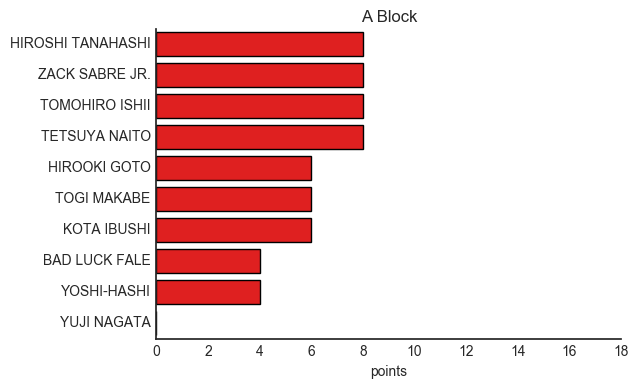

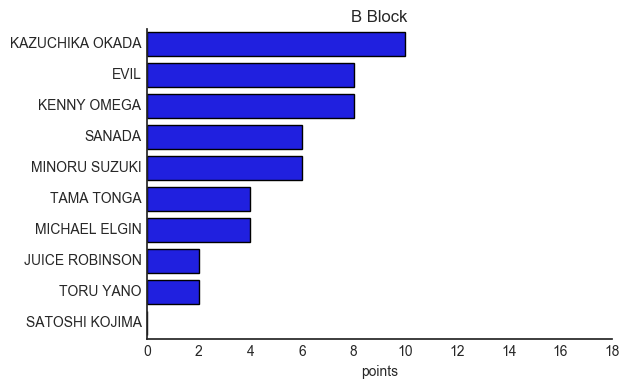

In [47]:

ax= sns.barplot(y='Wrestler', x='Points', data=A_Block, color= 'Red')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('points')
ax.set_title('A Block')
plt.show()
ax= sns.barplot(y='Wrestler', x='Points', data=B_Block,  color= 'Blue')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_xlabel('points')
ax.set_title('B Block')
plt.show()

In [36]:
updateresults(A_matches, 'Hirooki', 'Nagata', '15:02')# Day3
updateresults(A_matches,'ISHII', 'Togi', '15:51')
updateresults(A_matches,'Ibushi', 'Zack', '15:51')
updateresults(A_matches,'Tanaha', 'Fale', '11:05')
updateresults(A_matches,'Tetsuya', 'Yoshi', '22:19')

HIROOKI GOTO,YUJI NAGATA
TOMOHIRO ISHII,TOGI MAKABE
KOTA IBUSHI,ZACK SABRE JR.
HIROSHI TANAHASHI,BAD LUCK FALE
TETSUYA NAITO,YOSHI-HASHI


In [37]:
updateresults(B_matches, 'Yano', 'Kojima','09:12') # Day 4
updateresults(B_matches, 'Evil', 'Juice','11:46')
updateresults(B_matches, 'Omega', 'Tama','11:42')
updateresults(B_matches, 'Okada', 'Elgin','25:49')
updateresults(B_matches, 'Suzuki', 'Sanada','11:22')

TORU YANO,SATOSHI KOJIMA
EVIL,JUICE ROBINSON
KENNY OMEGA,TAMA TONGA
KAZUCHIKA OKADA,MICHAEL ELGIN
MINORU SUZUKI,SANADA


In [40]:
updateresults(A_matches, 'Zack', 'Yoshi','11:48') # Day 5
updateresults(A_matches, 'Hiroshi', 'YUji', '14:47')
updateresults(A_matches, 'Fale', 'Tetsuya', '11:55')
updateresults(A_matches, 'Kota', 'Ishii', '17:14')
updateresults(A_matches, 'Togi', 'Hirooki','16:55')

ZACK SABRE JR.,YOSHI-HASHI
HIROSHI TANAHASHI,YUJI NAGATA
BAD LUCK FALE,TETSUYA NAITO
KOTA IBUSHI,TOMOHIRO ISHII
TOGI MAKABE,HIROOKI GOTO


In [41]:
updateresults(B_matches, 'Elgin', 'Kojima','13:09') # Day 6
updateresults(B_matches, 'Evil', 'Tonga','10:27')
updateresults(B_matches, 'Omega', 'Yano', '11:31')
updateresults(B_matches, 'Okada', 'Sanada', '20:49')
updateresults(B_matches, 'Suzuki', 'Juice', '11:23')

MICHAEL ELGIN,SATOSHI KOJIMA
EVIL,TAMA TONGA
KENNY OMEGA,TORU YANO
KAZUCHIKA OKADA,SANADA
MINORU SUZUKI,JUICE ROBINSON


In [42]:
updateresults(A_matches, 'Ishii', 'Yoshi', '15:43') # Day 7
updateresults(A_matches, 'Hiroshi', 'hirooki', '17:22')
updateresults(A_matches, 'Zack', 'Fale', '09:02')
updateresults(A_matches, 'Togi', 'Kota', '13:20')
updateresults(A_matches, 'Tetsuya', 'Nagata', '15:16')

TOMOHIRO ISHII,YOSHI-HASHI
HIROSHI TANAHASHI,HIROOKI GOTO
ZACK SABRE JR.,BAD LUCK FALE
TOGI MAKABE,KOTA IBUSHI
TETSUYA NAITO,YUJI NAGATA


In [43]:
updateresults(B_matches, 'Okada', 'Kojima', '15:26') # Day 8
updateresults(B_matches, 'Tonga', 'Juice','10:36')
updateresults(B_matches, 'Elgin', 'Omega', '24:39')
updateresults(B_matches, 'Sanada', 'Toru', '04:33')
updateresults(B_matches, 'Evil', 'Suzuki', '08:38')

KAZUCHIKA OKADA,SATOSHI KOJIMA
TAMA TONGA,JUICE ROBINSON
MICHAEL ELGIN,KENNY OMEGA
SANADA,TORU YANO
EVIL,MINORU SUZUKI


In [44]:
updateresults(A_matches, 'Hiroshi', 'Yoshi', '13:34') # Day 9
updateresults(A_matches, 'Hirooki', 'Zack','10:10')
updateresults(A_matches, 'Fale', 'Kota', '11:37')
updateresults(A_matches, 'Togi', 'Nagata', '10:45')
updateresults(A_matches, 'Ishii', 'Tetsuya', '20:58')

HIROSHI TANAHASHI,YOSHI-HASHI
HIROOKI GOTO,ZACK SABRE JR.
BAD LUCK FALE,KOTA IBUSHI
TOGI MAKABE,YUJI NAGATA
TOMOHIRO ISHII,TETSUYA NAITO


In [45]:
updateresults(B_matches, 'Okada', 'Juice', '20:29') # Day 10
updateresults(B_matches, 'Evil', 'Yano', '1:33')
updateresults(B_matches, 'Sanada', 'Elgin', '15:06')
updateresults(B_matches, 'Omega', 'Kojima','12:42')
updateresults(B_matches, 'Suzuki', 'Tama','10:22')

KAZUCHIKA OKADA,JUICE ROBINSON
EVIL,TORU YANO
SANADA,MICHAEL ELGIN
KENNY OMEGA,SATOSHI KOJIMA
MINORU SUZUKI,TAMA TONGA


In [46]:
updateresults(A_matches, 'Ibushi', 'Kota', '20:40') # Day 11
updateresults(A_matches, 'Zack', 'Togi', '09:30')
updateresults(A_matches, 'Ishii', 'Nagata', '13:51')
updateresults(A_matches, 'Naito', 'Goto', '13:30')
updateresults(A_matches, 'Yoshi', 'Fale', '10:21')

KOTA IBUSHI,KOTA IBUSHI
ZACK SABRE JR.,TOGI MAKABE
TOMOHIRO ISHII,YUJI NAGATA
TETSUYA NAITO,HIROOKI GOTO
YOSHI-HASHI,BAD LUCK FALE
